In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'3.3.2'

In [3]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
#path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
#path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
#path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
#path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

df_train = pd.read_csv(path_bugzilla)
#df_test = pd.read_csv(path_columba)
#df_test = pd.read_csv(path_jdt)
#df_test = pd.read_csv(path_mozilla)
df_test = pd.read_csv(path_platform)
#df = pd.read_csv(path_postgres)

In [46]:
df_train.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,3,2001/12/12 17:41,1,1,3,0.579380,0.093620,0.000000,480.666667,1,14,596,0.666667,143,133.50,129,1
1,7,1999/10/12 12:57,1,1,1,0.000000,0.000000,0.000000,398.000000,1,1,0,1.000000,140,140.00,137,1
2,8,2002/5/15 16:55,3,3,52,0.739279,0.183477,0.208913,283.519231,0,23,15836,0.750000,984,818.65,978,0
3,9,2002/1/21 15:37,1,1,8,0.685328,0.016039,0.012880,514.375000,1,21,1281,1.000000,579,479.25,550,0
4,10,2001/12/19 16:44,2,2,38,0.769776,0.091829,0.072746,366.815789,1,21,6565,0.763158,413,313.25,405,0


In [47]:
df_test.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,88,2003/3/10 16:31,1,3,17,0.994911,0.159684,0.096443,74.411765,1,9,1377,0.823529,715,715.000000,17,0
1,119,2003/10/15 11:45,1,4,4,0.874002,0.090802,0.071934,212.000000,1,1,117,1.000000,4931,2809.466667,1076,1
2,558,2005/5/4 16:43,1,1,1,0.000000,0.008929,0.089286,336.000000,1,2,2,1.000000,9612,4256.970238,3790,0
3,671,2003/3/4 13:37,3,15,80,0.816872,0.877167,0.877167,85.787500,0,3,6526,0.475000,1836,1152.000000,1179,1
4,674,2005/1/27 22:50,1,1,6,0.777333,0.064397,0.156394,181.166667,0,2,2885,0.833333,4082,1326.607143,85,0


In [48]:

train_features = df_train.drop(columns='bug').columns.tolist()
test_features = df_test.drop(columns='bug', errors='ignore').columns.tolist()

# 2. Cek apakah keduanya sama
if train_features == test_features:
    print("✅ Fitur training dan testing SAMA.")
else:
    print("❌ Fitur TIDAK sama!")

    # Tampilkan perbedaannya
    missing_in_test = set(train_features) - set(test_features)
    missing_in_train = set(test_features) - set(train_features)

    if missing_in_test:
        print("🔻 Fitur yang ADA di training TAPI TIDAK ada di testing:")
        print(missing_in_test)

    if missing_in_train:
        print("🔺 Fitur yang ADA di testing TAPI TIDAK ada di training:")
        print(missing_in_train)


✅ Fitur training dan testing SAMA.


In [49]:

df_test.drop(['transactionid', 'commitdate'], axis=1, inplace=True)

In [50]:
# 2. Load Model Terbaik dari Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/bugzilla_best_model'
loaded_model = load_model(model_path)

Transformation Pipeline and Model Successfully Loaded


In [51]:
# 3. Prediksi terhadap data Mozilla
predictions = predict_model(loaded_model, data=df_test)

In [52]:
print(predictions.columns)

Index(['ns', 'nm', 'nf', 'entropy', 'la', 'ld', 'lt', 'fix', 'ndev', 'pd',
       'npt', 'exp', 'rexp', 'sexp', 'bug', 'prediction_label',
       'prediction_score'],
      dtype='object')


In [53]:
# Evaluasi jika ada kolom 'bug'
if 'bug' in df_test.columns:
    y_true = df_test['bug']
    y_pred = predictions['prediction_label']

    print("✅ Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n✅ Classification Report:\n", classification_report(y_true, y_pred))
else:
    print("✅ Prediksi (tanpa label):")
    print(predictions[['prediction_label', 'prediction_score']].head())

✅ Confusion Matrix:
 [[47440  7358]
 [ 5804  3648]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     54798
           1       0.33      0.39      0.36      9452

    accuracy                           0.80     64250
   macro avg       0.61      0.63      0.62     64250
weighted avg       0.81      0.80      0.80     64250



In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

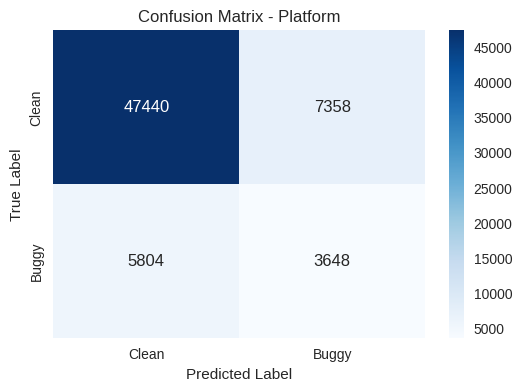

In [55]:
# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clean', 'Buggy'],
            yticklabels=['Clean', 'Buggy'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Platform')
plt.show()


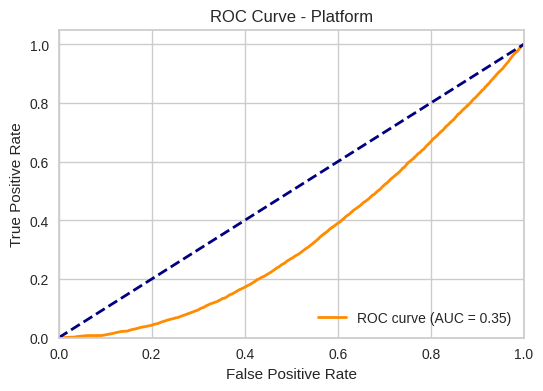

In [56]:
# Pastikan y_true hanya 0/1 dan prediction_score tersedia
if 'prediction_score' in predictions.columns:
    y_score = predictions['prediction_score']

    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Platform')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("❌ prediction_score tidak tersedia, ROC curve tidak bisa ditampilkan.")
